<a href="https://colab.research.google.com/github/deboraxhx/JornadaDataScience/blob/master/video_game_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
video_game = pd.read_csv('/content/drive/My Drive/DATASETS/vgsales.csv')

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape.
It is based on BeautifulSoup using Python.
There are 16,598 records. 2 records were dropped due to incomplete information.

In [ ]:
video_game.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
video_game.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
if video_game.duplicated().count() == len(video_game.index):
  print('Não há colunas duplicadas')

print(f'Dimensão do dataset: {video_game.shape}')

Não há colunas duplicadas
Dimensão do dataset: (16598, 11)


In [ ]:
video_game.isnull().count()

Rank            16598
Name            16598
Platform        16598
Year            16598
Genre           16598
Publisher       16598
NA_Sales        16598
EU_Sales        16598
JP_Sales        16598
Other_Sales     16598
Global_Sales    16598
dtype: int64

In [ ]:
print('Não há dados faltantes')

Não há dados faltantes


In [ ]:
video_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
#converetendo os dados
video_game = video_game.convert_dtypes()
video_game.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
video_game['Platform'].unique()

<StringArray>
[ 'Wii',  'NES',   'GB',   'DS', 'X360',  'PS3',  'PS2', 'SNES',  'GBA',
  '3DS',  'PS4',  'N64',   'PS',   'XB',   'PC', '2600',  'PSP', 'XOne',
   'GC', 'WiiU',  'GEN',   'DC',  'PSV',  'SAT',  'SCD',   'WS',   'NG',
 'TG16',  '3DO',   'GG', 'PCFX']
Length: 31, dtype: string

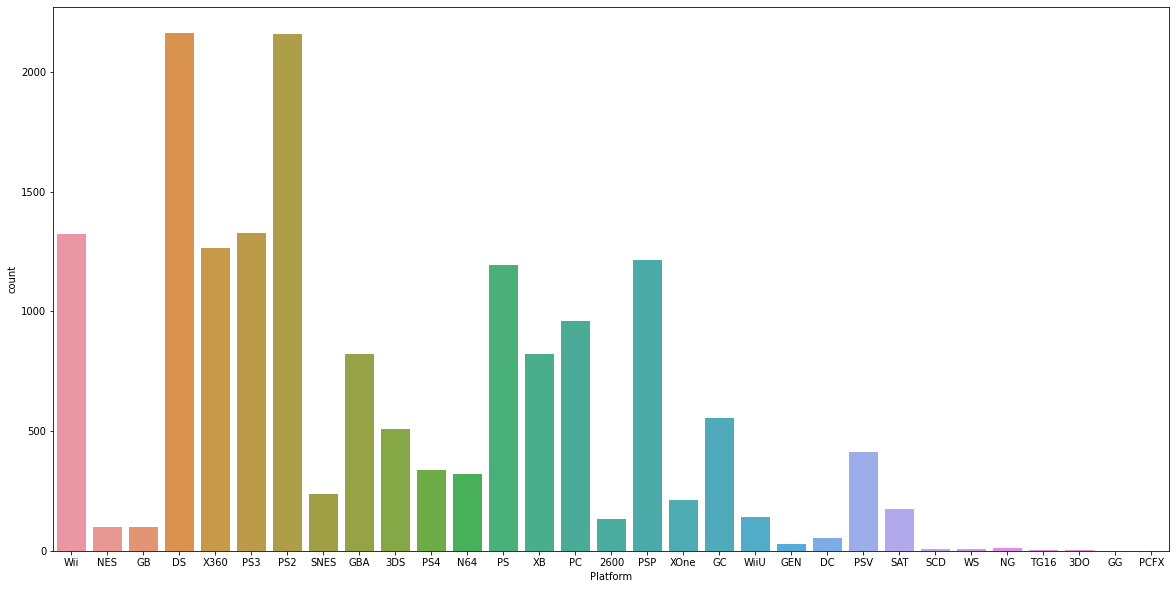

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(video_game['Platform'])

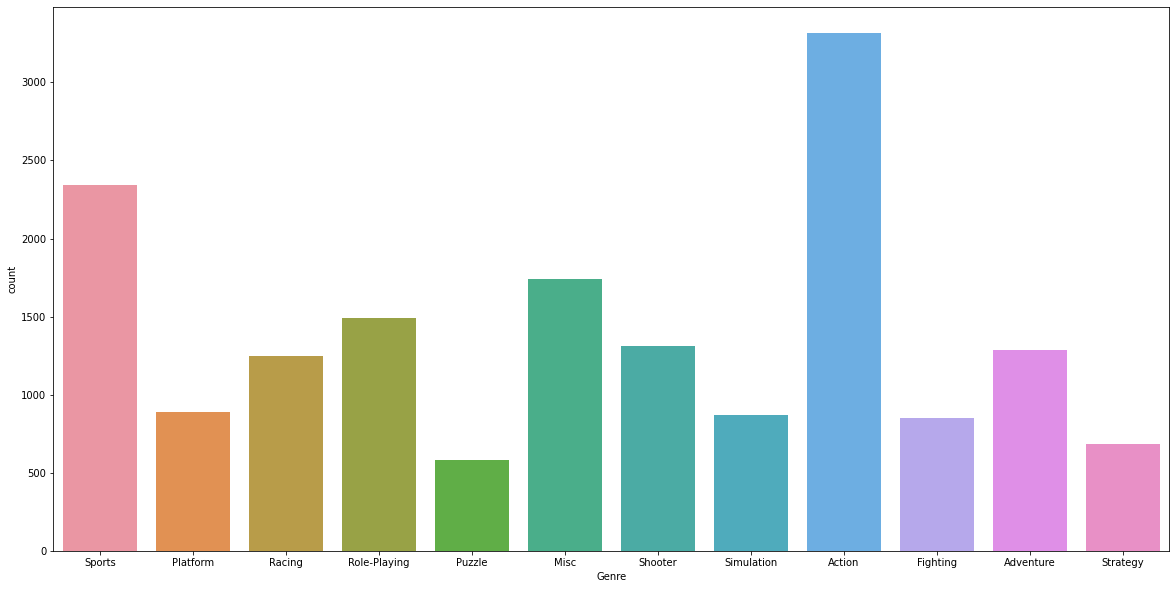

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(video_game['Genre'])

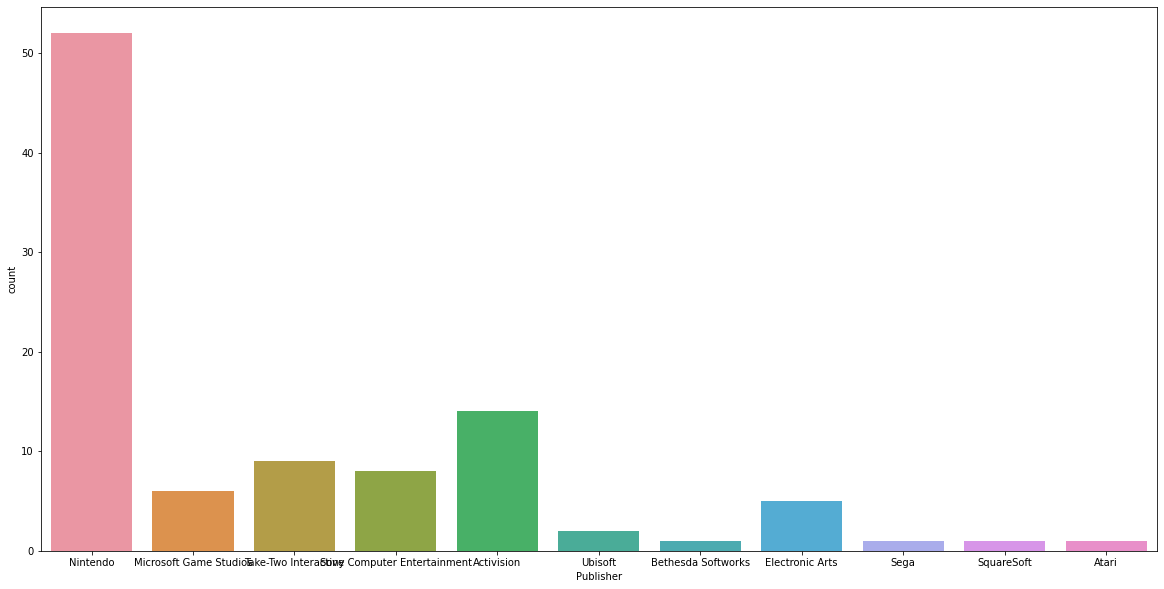

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(video_game['Publisher'].iloc[0:100])

In [ ]:
video_game['Publisher'].unique()

<StringArray>
[                   'Nintendo',      'Microsoft Game Studios',
        'Take-Two Interactive', 'Sony Computer Entertainment',
                  'Activision',                     'Ubisoft',
          'Bethesda Softworks',             'Electronic Arts',
                        'Sega',                  'SquareSoft',
 ...
                   'Nitroplus',         'Paradox Development',
                     'Otomate',                   'Ongakukan',
                    'Commseed',                'Inti Creates',
                      'Takuyo',          'Interchannel-Holon',
                  'Rain Games',           'UIG Entertainment']
Length: 579, dtype: string

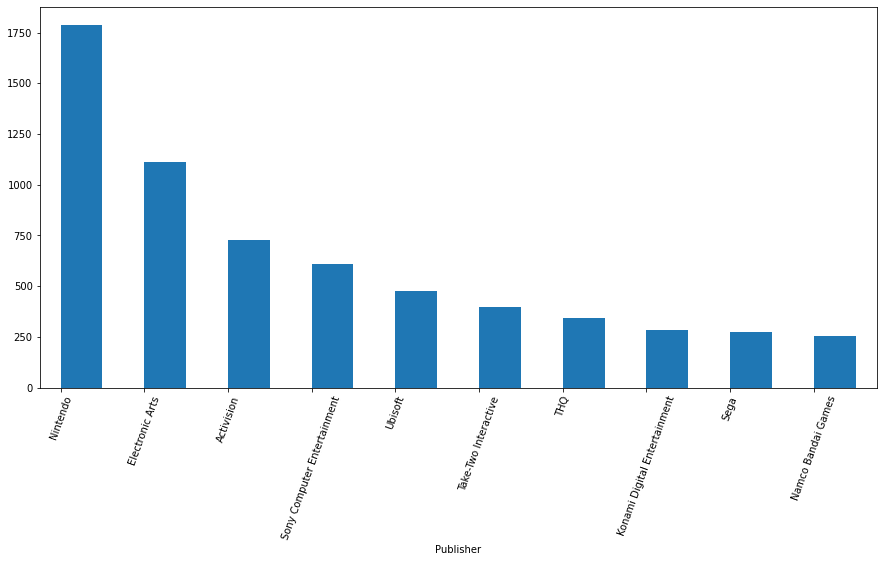

In [ ]:
#agrupar Publisher x Receita
top = video_game.groupby(['Publisher'], sort=False)['Global_Sales'].sum()
top_10 = top.sort_values(ascending=False).iloc[0:10]

plt.figure(figsize=(15,7))
top_10.plot(kind='bar', position=0)
plt.xticks(rotation = 70)

plt.show()

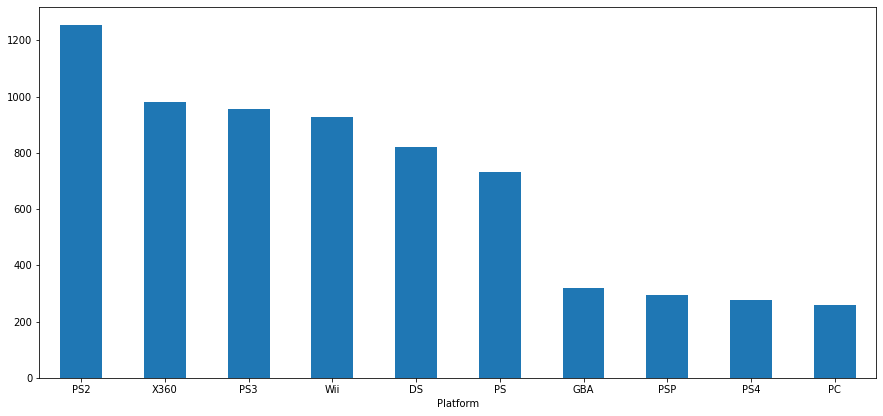

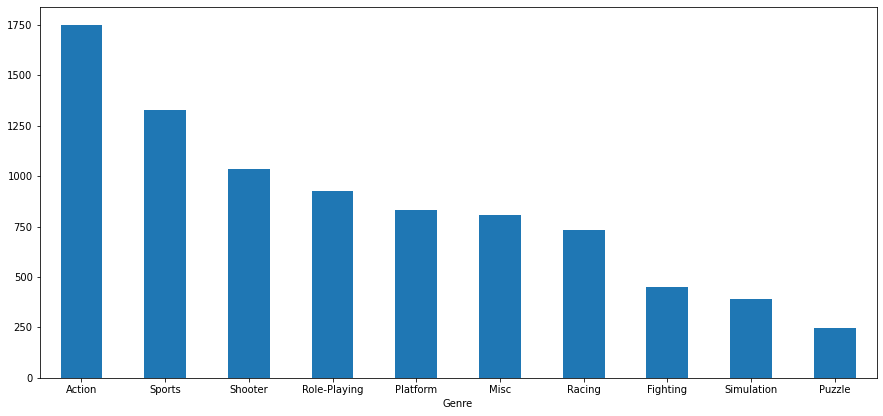

In [ ]:

plt.rcParams['figure.figsize'] = (15,15)

# Agrupar Platform x Global_Sales
top_platform = video_game.groupby(['Platform'])['Global_Sales'].sum()
top_platform_10 = top_platform.sort_values(ascending=False).iloc[0:10]

plt.subplot(2,1,1)
top_platform_10.plot(kind='bar')
plt.xticks(rotation = 0)

plt.show()


top_genre = video_game.groupby(['Genre'])['Global_Sales'].sum()
top_genre_10 = top_genre.sort_values(ascending=False).iloc[0:10]

plt.subplot(2,1,1)
top_genre_10.plot(kind='bar')
plt.xticks(rotation = 0)

plt.show()

In [ ]:
#agrupandado por ano
top_platform_year = video_game.groupby(['Year','Platform'])['Global_Sales'].sum()
#top_platform__year_10 = top_platform_year.sort_values(ascending=False).iloc[0:10]

#top_platform = video_game.groupby(['Platform'])['Global_Sales'].sum()
#top_platform_10 = top_platform.sort_values(ascending=False).iloc[0:10]

#top_platform = video_game.groupby(['Platform'])['Global_Sales'].sum()
#top_platform_10 = top_platform.sort_values(ascending=False).iloc[0:10]

In [ ]:
top_platform_year = top_platform_year.to_frame()

In [ ]:
tops= top_platform_year.groupby(['Year'])['Global_Sales'].max()
tops

Year
1980     11.38
1981     35.77
1982     28.86
1983     10.96
1984     50.09
1985     53.44
1986     36.41
1987     19.76
1988     45.01
1989     64.98
1990     26.16
1991     16.21
1992     32.98
1993     40.01
1994     35.08
1995     35.92
1996     94.68
1997    136.08
1998    169.58
1999    144.57
2000     96.28
2001    166.43
2002    205.40
2003    184.29
2004    211.78
2005    160.65
2006    137.91
2007    154.97
2008    174.16
2009    210.44
2010    171.05
2011    159.37
2012    109.49
2013    117.39
2014     98.76
2015    115.30
2016     39.25
2017      0.03
2020      0.29
Name: Global_Sales, dtype: float64

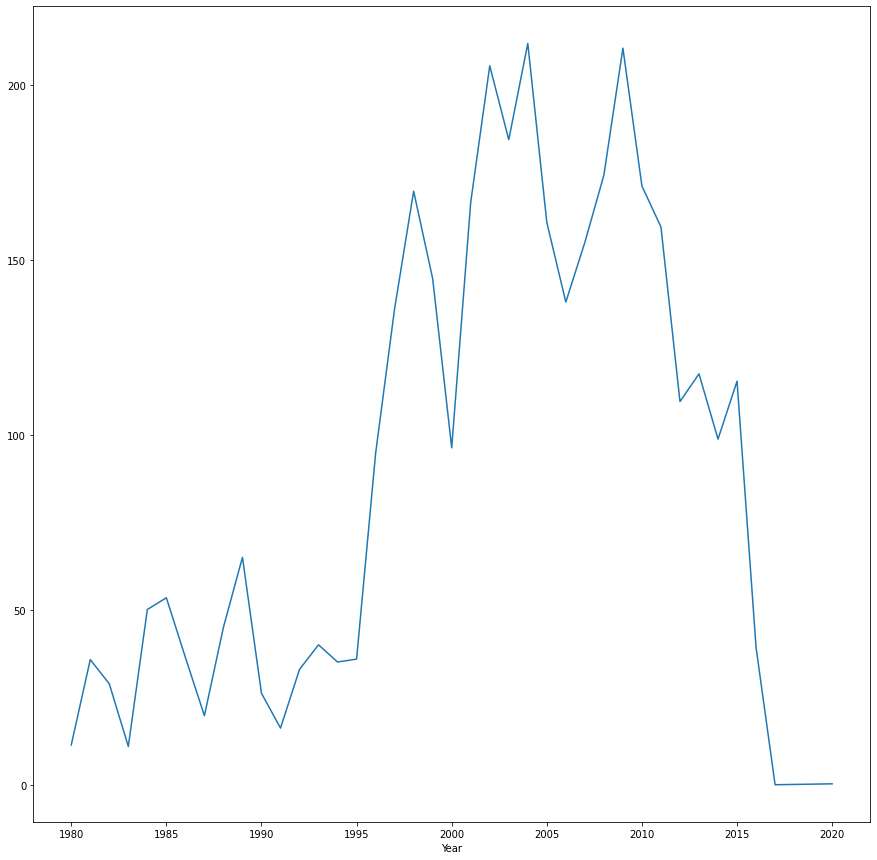

In [ ]:
tops.plot(kind='line')

plt.show()

In [ ]:
video_game['Year'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2003, 1986, 2000, <NA>, 1995, 2016, 1991, 1981, 1987, 1980, 1983, 2020,
 2017]
Length: 40, dtype: Int64